## Masalah Sorting

Diberikan barisan tak terurut $A=\{a_1, a_2, \cdots, a_N\}$, dimana $a_1, a_2, \cdots, a_N$ adalah bilangan bulat. Tujuannya adalah ingin __mengurutkan__ elemen-elemen di $A$ sedemikian sehingga terbentuk barisan terurut $A=\{a_1^*, a_2^*, \cdots, a_N^*\}$, dimana $a_1^* \leq a_2^* \leq \cdots \leq a_N^*$ (ascending).

Best-Case:
A = {1,2,3,4,5}

A* = {1,2,3,4,5}

Worst-Case:
A = {5,4,3,2,1}

A* = {1,2,3,4,5}

### Implementasi Bubble Sort (Brute-Force)


```
Algoritma: BubbleSort (A)
  N = len(A)
  for i=0 to N-1  ------------------- N
    for j=0 to N-1 ------------------ N*N
      if A[j] > A[j+1] -------------- N*N
        # Tukar elemen
        temp = A[j] ----------------- N*N
        A[j] = A[j+1] --------------- N*N
        A[j+1] = temp --------------- N*N
        ##############
      endif
    endfor
  endfor ---------------------------------- +
  return A                    T(N) = 5N^2 + N
```

Worst-Case: $T(N) = 5N^2 + N = O(N^2)$

Best-Case: $T(N) = 1 = O(1)$

Average-Case: $T(N) = (5N^2 + N + 1)/2 = O(N^2)$

In [29]:
def bubbleSort(arr):
  panjang_arr = len(arr)
  for i in range(panjang_arr-1):
    for j in range(panjang_arr-1):
      if arr[j] > arr[j+1]:
        arr[j], arr[j+1] = arr[j+1], arr[j] # Penukaran elemen 
  return arr

### Implementasi Merge Sort (Divide and Conquer)

```
Algoritma: MergeSort (l, h)
  if l < h ---------------------------------------- 1
    mid = ceil((l+h)/2) --------------------------- 1
    MergeSort(l, mid) ----------------------------- T(N/2)
    MergeSort(mid+1, h) --------------------------- T(N/2)
    Merge(A, l, mid, h) --------------------------- O(N)
  return A ----------------------------------------------- +
                                                    T(N) = 2T(N/2) + 2 + O(N)

Algoritma: Merge (A, l, mid, h) ------ T(N) = O(N)
  n1 = mid - l + 1
  n2 = h - mid

  Misalkan L[1..n1 + 1] dan R[1..n2 + 1]
  for i = 1 to n1
    L[i] = A[l + i - 1]
  for j = 1 to n2
    R[j] = A[q + j]
  L[n1 + 1] = \infty
  R[n2 + 1] = \infty

  i = 1, j = 1
  for k = l to h
    if L[i] <= R[j]
      A[k] = L[i]
      i = i + 1
    else 
      A[k] = R[j]
      j = j + 1
```

Worst-Case: $O(N \log N)$

Best-Case: $\Omega(N \log N)$

Average-Case: $\Theta(N \log N)$

In [30]:
def mergeSort(arr):
  panjang_arr = len(arr) # Menentukan panjang barisan

  # Cek jika panjang barisan == 1 maka barisan sudah tersortir
  if panjang_arr == 1: 
    return arr
  
  # Menentukan titik tengah dari barisan
  mid = panjang_arr // 2

  # Buat partisi sebelah kanan dan kiri
  partisi_kiri = mergeSort(arr[:mid])
  partisi_kanan = mergeSort(arr[mid:])

  return merge(partisi_kiri, partisi_kanan)

def merge(kiri, kanan):
  # Inisialisasi output
  output = []
  i = j = 0

  # Penukaran elemen di partisi kiri dan kanan
  while i < len(kiri) and j < len(kanan):
    if kiri[i] < kanan[j]:
      output.append(kiri[i])
      i += 1
    else:
      output.append(kanan[j])
      j += 1
      
  # penggabungan elemen
  output.extend(kiri[i:])
  output.extend(kanan[j:])

  return output

In [31]:
barisan = [4,0,6,5,3,9,8,2,1,7]
print(barisan)
barisan_sorted = mergeSort(barisan)
print(barisan_sorted)

[4, 0, 6, 5, 3, 9, 8, 2, 1, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [32]:
barisan_sorted_bubble_sort = bubbleSort(barisan)
print(barisan_sorted_bubble_sort)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


###Tugas

Buatlah suatu eksperimen dengan mengubah-ubah N (yaitu banyaknya elemen) N1 = 10, N2 = 50, N3 = 100, N4 = 500, N5 = 1000, N6 = 2000, N7 = 5000, N8 = 10000. Hitung waktu eksekusi untuk tiap-tiap N (N1, N2, ..., N8) dengan library `time` di python pada Algoritma Bubble Sort dan Merge Sort. Buat juga grafiknya (sumbu-x menyatakan N dan sumbu-y menyatakan waktu eksekusi)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [34]:
def exec(n=1, flag='MS'):
  T = []
  for i in range(1, n+1):
    S = np.random.randint(0,1000,i)
    if flag == 'MS':
      start_time = time.time()
      mergeSort(S)
      end_time = time.time()
    elif flag == 'BS':
      start_time = time.time()
      bubbleSort(S)
      end_time = time.time()

    T.append(end_time - start_time)

  return T

In [35]:
waktu_MS = exec(1000, 'MS')
print(waktu_MS)

[3.814697265625e-06, 2.4318695068359375e-05, 2.9325485229492188e-05, 2.5272369384765625e-05, 3.552436828613281e-05, 4.1484832763671875e-05, 4.649162292480469e-05, 4.9591064453125e-05, 6.866455078125e-05, 0.0002613067626953125, 8.916854858398438e-05, 9.775161743164062e-05, 9.584426879882812e-05, 9.989738464355469e-05, 0.00012350082397460938, 0.00011348724365234375, 0.00012731552124023438, 0.00014090538024902344, 0.00015473365783691406, 0.0001456737518310547, 0.0001804828643798828, 0.00016117095947265625, 0.00016236305236816406, 0.00042557716369628906, 0.0002048015594482422, 0.0002148151397705078, 0.00020623207092285156, 0.00042510032653808594, 0.00013327598571777344, 0.0001289844512939453, 0.00013113021850585938, 0.00015735626220703125, 0.0001480579376220703, 0.00014853477478027344, 0.00015473365783691406, 0.0001628398895263672, 0.0001621246337890625, 0.00019741058349609375, 0.00017571449279785156, 0.0001842975616455078, 0.0002148151397705078, 0.0003514289855957031, 0.000195980072021484

In [36]:
waktu_BS = exec(1000, 'BS') # Butuh waktu 10 menit lebih!

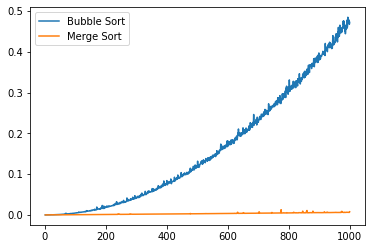

In [37]:
X = np.linspace(1, 1000, 1000)
plt.plot(X, waktu_BS, label='Bubble Sort')
plt.plot(X, waktu_MS[:1000], label='Merge Sort')
plt.legend();

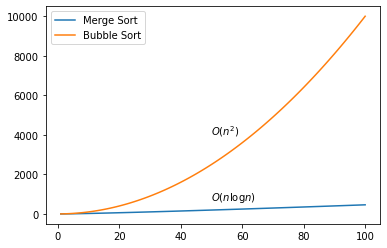

In [38]:
x = np.linspace(1, 100, 100)
f1 = x*np.log(x)
f2 = x**2
plt.plot(x, f1, x, f2);
plt.annotate('$O(n \log n)$', (50, 700))
plt.annotate('$O(n^2)$', (50, 4000))
#plt.ylim([0, 5]);
#plt.xlim([1,2]);
plt.legend(["Merge Sort", "Bubble Sort"]);

### Fungsi Rekursif

In [39]:
def Test(n):
  if n > 0:
    print(n)
    Test(n-1)

In [40]:
Test(10)

10
9
8
7
6
5
4
3
2
1


In [41]:
def Test1(n):
  if n > 0:
    for i in range(1, n+1):
      print(n)
    Test1(n-1)

In [42]:
Test1(3)

3
3
3
2
2
1


In [43]:
def Test2(n):
  if n > 1:
    print(n)
    Test2(n/2)

In [44]:
Test2(3)

3
1.5


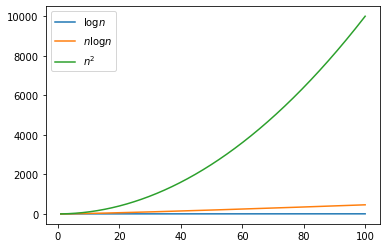

In [45]:
X = np.linspace(1,100, 1000)
plt.plot(X, np.log(X), label='$\log n$');
plt.plot(X, X*np.log(X), label = '$n \log n$')
plt.plot(X, X**2, label = '$n^2$')
plt.legend();